In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# LEEMOS DATASET ORIGINAL PARA FILTRAR FEATURES Y DATOS NO DESEADOS
***

In [2]:
df_orig = pd.read_csv(r"./heart_failure_clinical_records_dataset.csv")

In [3]:
df_orig.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
# df_orig.isnull().any()    # NO HAY NULLS/NaN
# df_orig.info()            # NO HAY VARIABLES CATEGORICAS QUE NECESITEN ENCODE

<AxesSubplot:xlabel='time', ylabel='Count'>

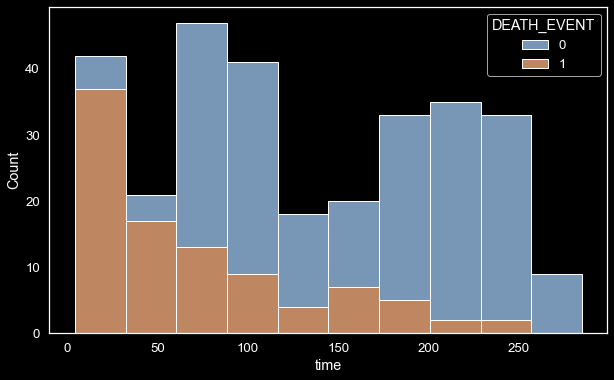

In [42]:
sns.set(font_scale = 1.2)
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_orig,x=df_orig["time"],hue="DEATH_EVENT",palette="pastel",multiple="stack")

In [3]:
df_cleaned = df_orig.drop(["time"],axis=1)  # SACAMOS EL FEATURE TIME 
#df_cleaned.head()

In [12]:
#df_cleaned[df_cleaned["sex"]==0]["serum_creatinine"].mean()

1.3840952380952385

In [5]:
df_cleaned.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


## VALORES NORMALES SEGUN DON GOOGLE
***
- Creatinina Sérica
    - 0.7 - 1.3 mg/dL para los hombres
    - 0.6 - 1.1 mg/dL para las mujeres
- Creatinina Fosfocinasa
    - 10 - 120 mcg/L
- Sodio Sérico
    - 135 - 145 mEq/L
- Plaquetas
    - 150000k a 400000k plaq/mL
- Fracción de Eyección
    - 50 - 75% (41% límite)
***

## GRÁFICOS DE DISTRIBUCIONES

In [4]:
props_binarias = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
props_continuas = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]

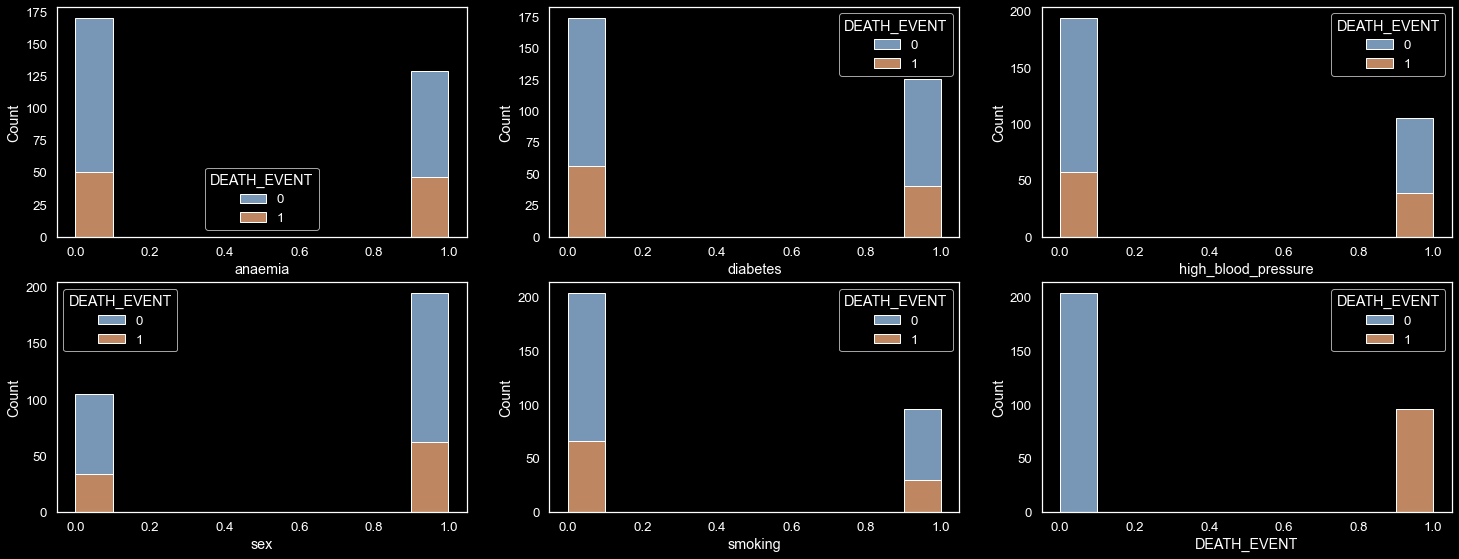

In [7]:
sns.set(font_scale = 1.2)
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(25, 60))
for idx,feature in enumerate(props_binarias):
    plt.subplot(df_cleaned.shape[1],3,idx+1)
    sns.histplot(data=df_cleaned,x=df_cleaned[feature],hue="DEATH_EVENT",palette="pastel",multiple="stack")

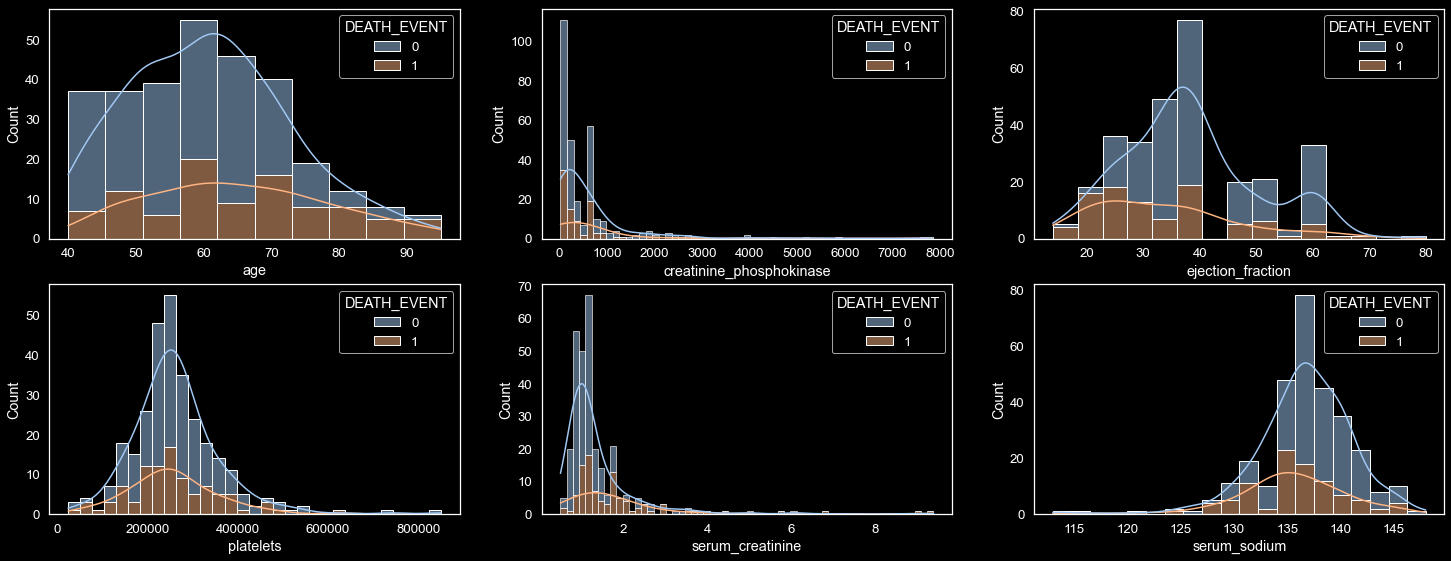

In [18]:
sns.set(font_scale = 1.2)
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(25, 60))
for idx,feature in enumerate(props_continuas):
    plt.subplot(df_cleaned.shape[1],3,idx+1)
    sns.histplot(data=df_cleaned,x=df_cleaned[feature],hue="DEATH_EVENT",palette="pastel",multiple="stack",kde=True)

## GRÁFICOS DE DISTRIBUCIÓN DE VARIABLES CONTINUAS CON DESCARTE DE 2.5% SUPERIOR (VER)  

In [30]:
df_cleaned_bis = df_cleaned[(df_cleaned["serum_creatinine"]<=df_cleaned["serum_creatinine"].quantile(0.975))&(df_cleaned["creatinine_phosphokinase"]<=df_cleaned["creatinine_phosphokinase"].quantile(0.975))&(df_cleaned["platelets"]<=df_cleaned["platelets"].quantile(0.975))]

In [87]:
df_cleaned_bis.describe()   # SI HACEMOS ESTE FILTRO NOS QUEDAMOS CON 276 PACIENTES

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,60.714978,0.434783,454.818841,0.420290,38.010870,0.351449,254265.705399,1.257101,136.637681,0.648551,0.318841,0.307971
std,11.729962,0.496629,522.736579,0.494502,11.700655,0.478290,78596.481468,0.562349,4.450033,0.478290,0.466874,0.462493
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,0.000000
25%,50.750000,0.000000,117.250000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,244.500000,0.000000,38.000000,0.000000,259500.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,69.250000,1.000000,582.000000,1.000000,45.000000,1.000000,298500.000000,1.400000,140.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,2695.000000,1.000000,80.000000,1.000000,481000.000000,3.800000,148.000000,1.000000,1.000000,1.000000


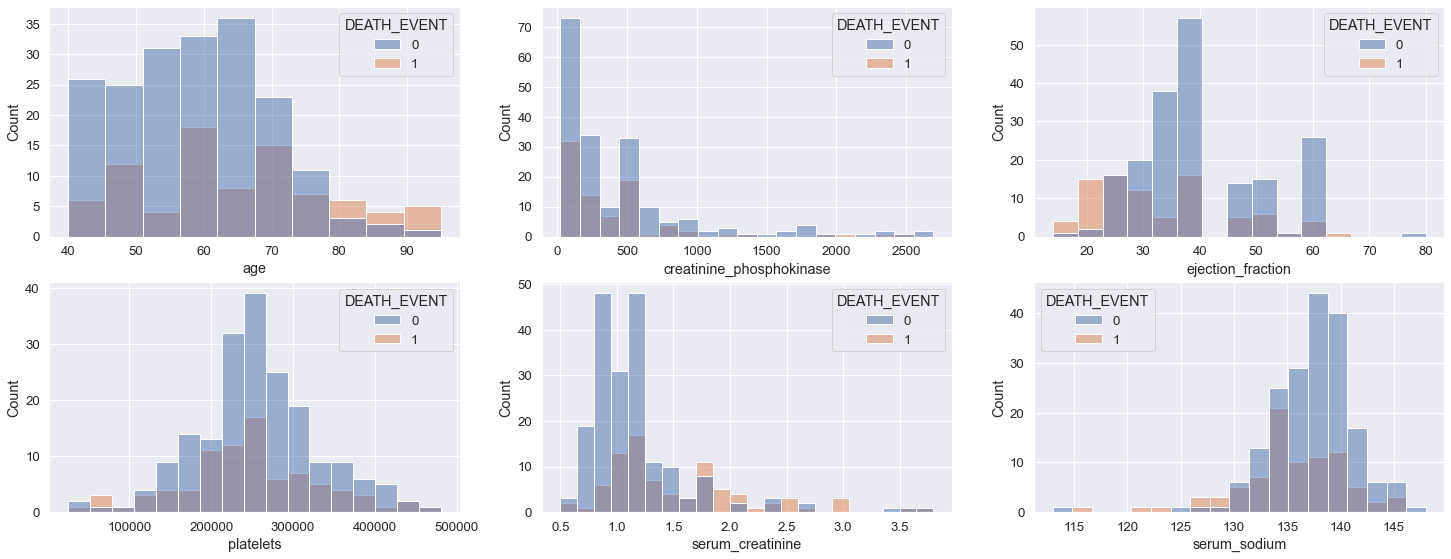

In [91]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(25, 60))
for idx,feature in enumerate(props_continuas):
    plt.subplot(df_cleaned_bis.shape[1],3,idx+1)
    sns.histplot(data=df_cleaned_bis,x=df_cleaned_bis[feature],hue="DEATH_EVENT")

### CLUSTERMAP
#### Basicamente te muestra que features están mas relacionados entre sí, además "pinto" el DEATH_EVENT a ver si es capaz de clasificar solo pero no puede.

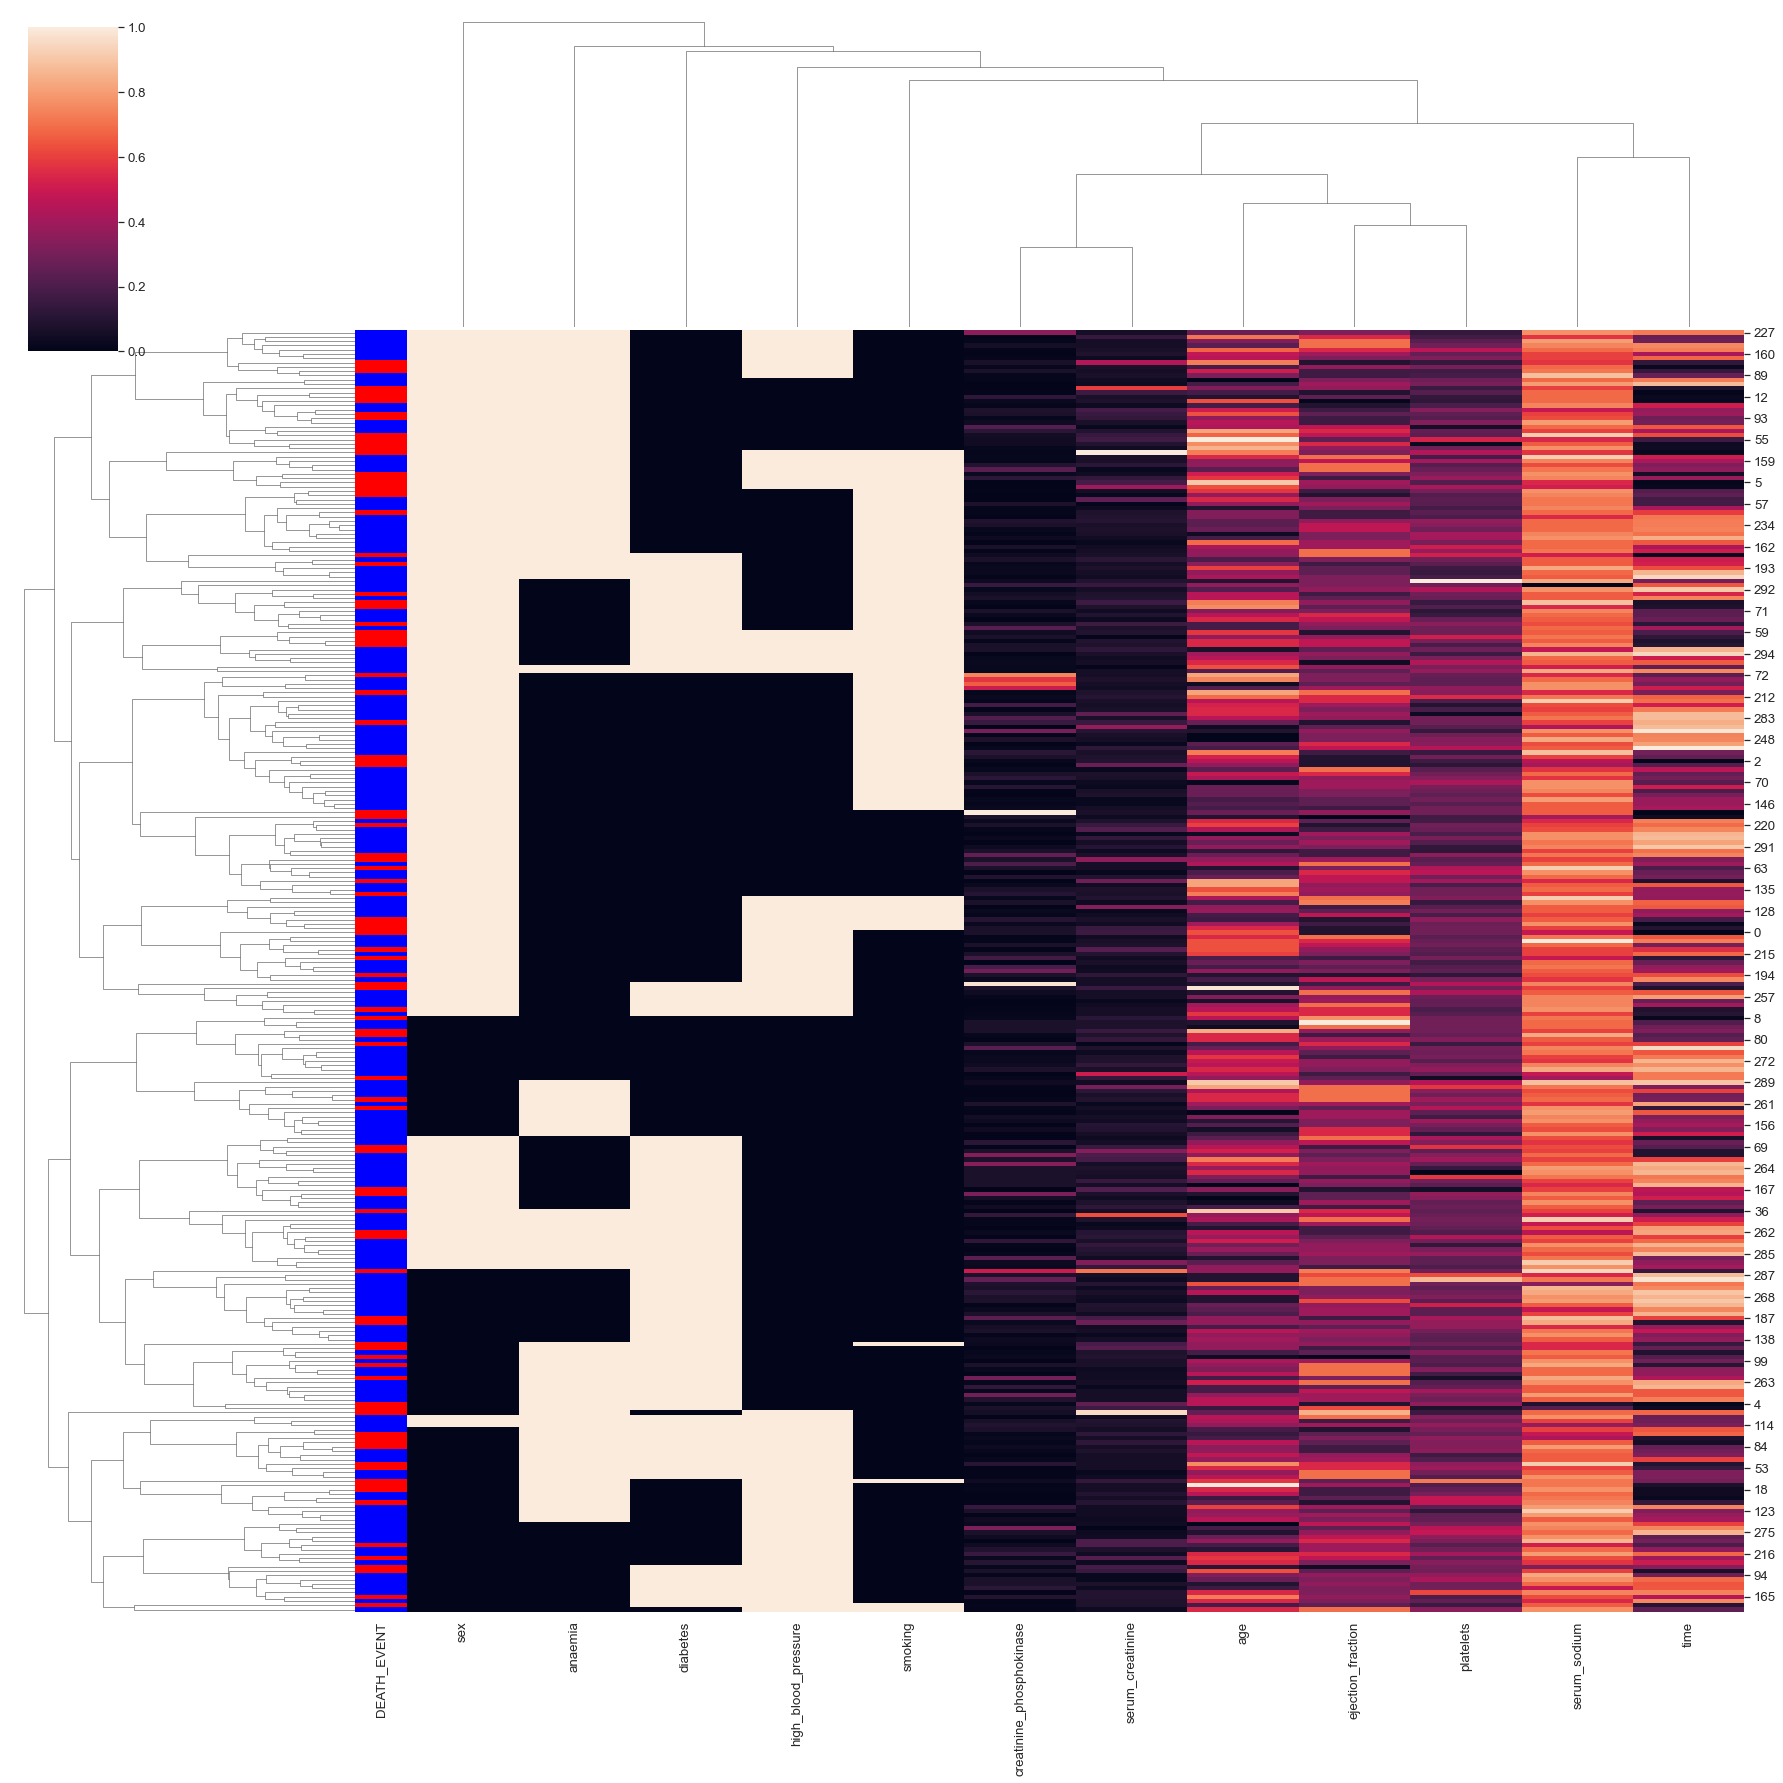

In [43]:
sns.set(font_scale = 1.2)
muerte_color = df_orig["DEATH_EVENT"].map({0:"blue",1:"red"})
sns.clustermap(df_orig.drop(["DEATH_EVENT"],axis=1),figsize=(25, 25),standard_scale=1,row_colors=muerte_color)

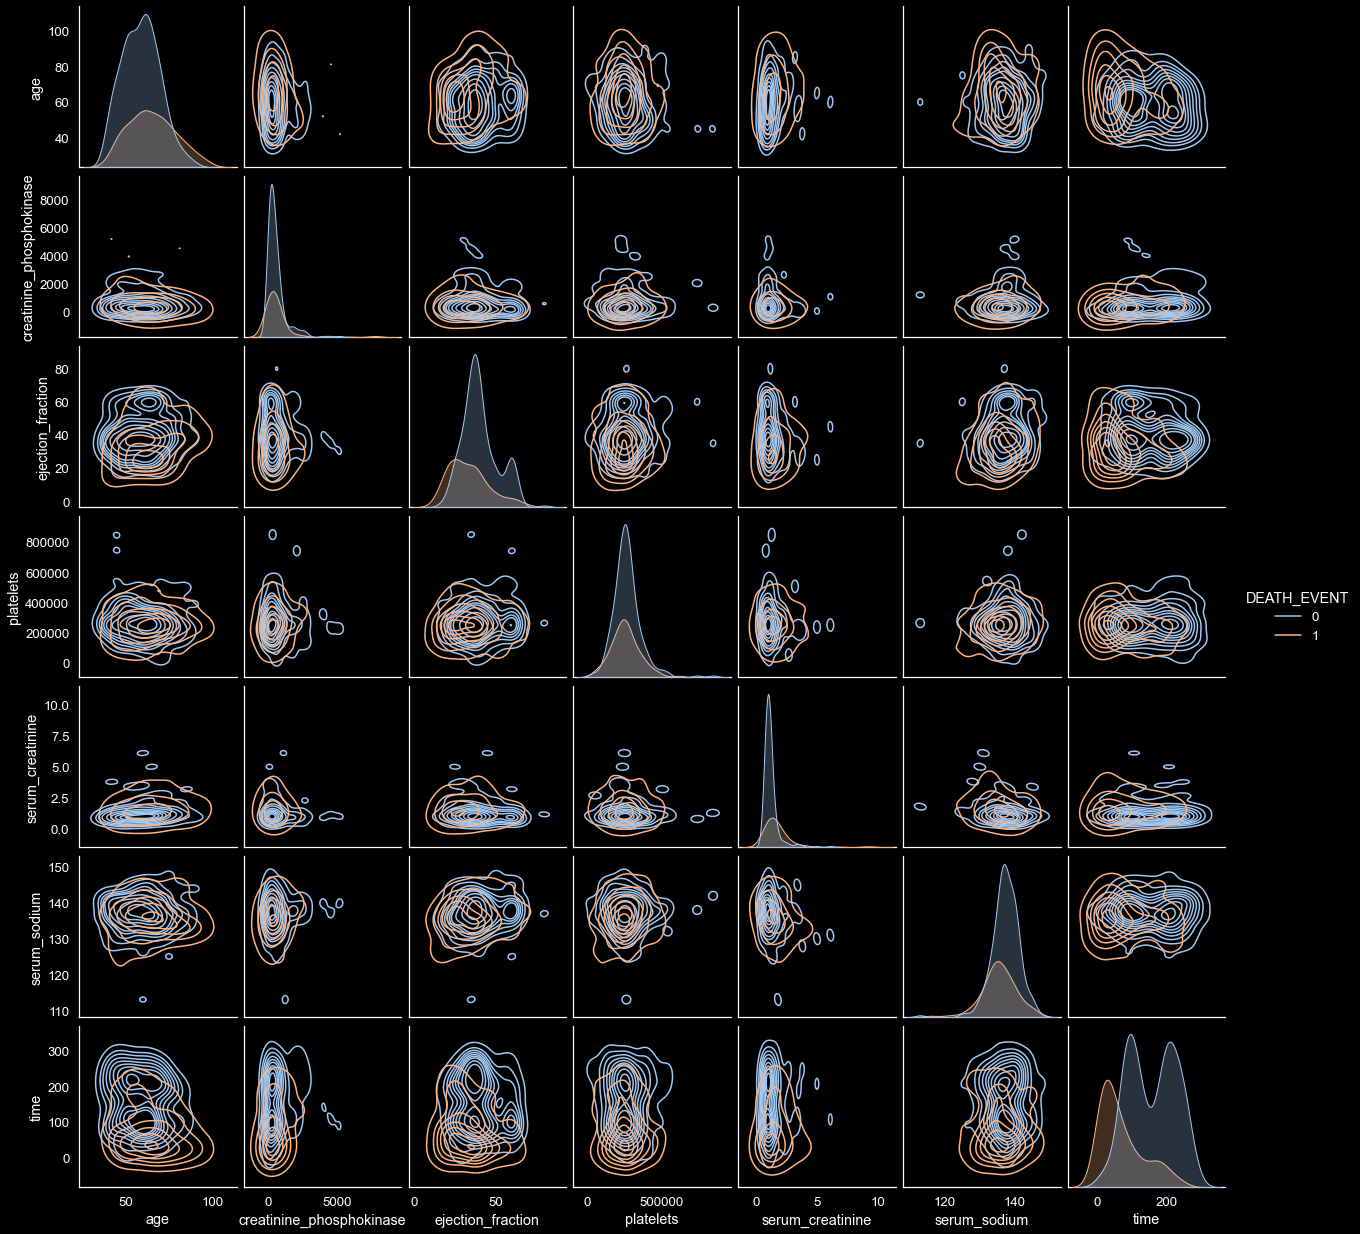

In [22]:
sns.set(font_scale = 1.2)
sns.set_style("dark")
plt.style.use("dark_background")
sns.pairplot(data=df_orig.drop(["anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1),hue="DEATH_EVENT",palette="pastel",kind="kde")